## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df=pd.merge(mouse_metadata, study_results, on= "Mouse ID")
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mice_n= data_df["Mouse ID"].value_counts().count()
mice_n

249

In [3]:
#NOT REQUESTED #Check missing values
data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicates.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df=data_df[duplicates]
duplicates_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
#NOT REQUESTED #Count number of duplicates
duplicates_df.count()

Mouse ID              10
Drug Regimen          10
Sex                   10
Age_months            10
Weight (g)            10
Timepoint             10
Tumor Volume (mm3)    10
Metastatic Sites      10
dtype: int64

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=data_df.drop(duplicates_df.index)
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_n_clean= clean_data_df["Mouse ID"].value_counts().count()
mice_n_clean

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
#for each regimen

drug_regimen_df=clean_data_df.groupby("Drug Regimen")
drug_regimen_df

#calculate statistics
tumor_v=drug_regimen_df["Tumor Volume (mm3)"]
mean=tumor_v.mean()
median=tumor_v.median()
variance=tumor_v.var(ddof=0)
st_dev=tumor_v.std(ddof=0)
sem=tumor_v.sem()

#generate summary []
summary=[tumor_v.mean(), tumor_v.median(), tumor_v.var(ddof=0), tumor_v.std(ddof=0), \
         tumor_v.sem()]

#generate summary table
column_names=["Mean", "Median", "Variance", "Standar Deviation", "SEM"]
summary_tumor_volume_df=pd.concat(summary, axis=1)
summary_tumor_volume_df.columns=column_names
summary_tumor_volume_df.columns.name="Tumor Volume (mm3)"
summary_tumor_volume_df

Tumor Volume (mm3),Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.458254,50.854632,43.761912,6.615279,0.540135
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar Plots

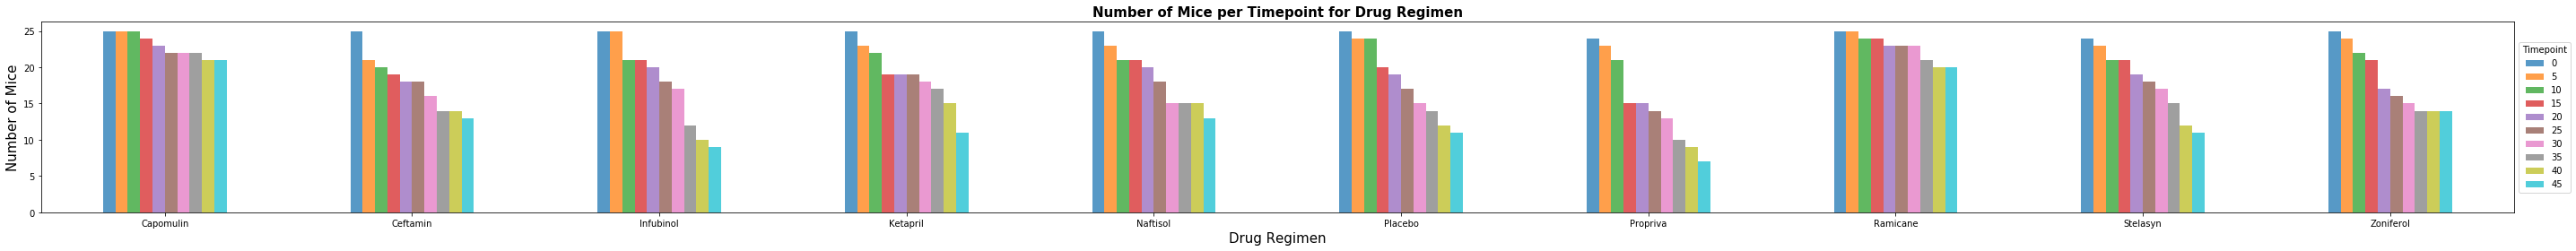

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study
#using pandas.

mice_per_drug=clean_data_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"].unstack(level=1)

mice_per_drug.plot(kind= "bar", figsize=(40,4), alpha=0.75)
plt.title("Number of Mice per Timepoint for Drug Regimen", fontweight="bold", fontsize=15)
plt.ylabel("Number of Mice", fontsize=15)
plt.xlabel("Drug Regimen", fontsize=15)
plt.xticks(rotation=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), title="Timepoint")

plt.tight_layout()


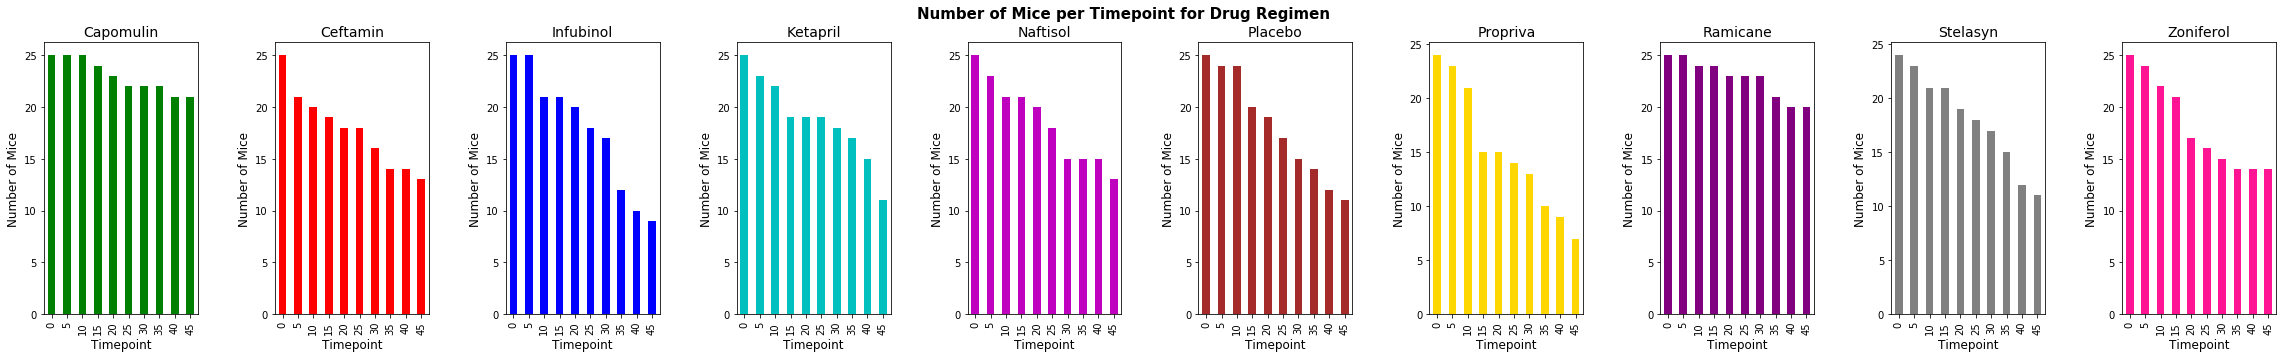

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
#using pyplot.

mice_number=clean_data_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"].unstack(level=1)

#Create figure
fig, axis=plt.subplots(nrows=1, ncols=10, figsize=(40,5))
fig.suptitle("Number of Mice per Timepoint for Drug Regimen", fontsize=15, fontweight="bold")
fig.subplots_adjust(hspace=0.5,wspace=0.5)


colors=["g", "r", "b", "c", "m", "brown", "gold", "purple", "grey", "deeppink"]

#Define function to plot
def plot_bar_1():
    plot=mice_number.iloc[i,:].plot(kind="bar", ax=axis[i], color=colors[i],).set_ylabel("Number of Mice", fontsize=12)
    axis[i].set_xlabel("Timepoint", fontsize=12)
    axis[i].set_title(mice_number.index[i], fontsize=14)
    return plot

#Plot all drugs
for i in range(10):
    plot_bar_1()


## Pie Plots

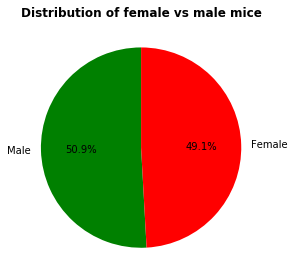

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors=["green", "red"]

mice_sex_plot= clean_data_df["Sex"].value_counts().plot(kind="pie", y=clean_data_df["Sex"].unique(),\
                                                       autopct="%1.1f%%", startangle=90, colors=colors)

plt.title("Distribution of female vs male mice", fontweight="bold", fontsize=12)
plt.ylabel("")
plt.tight_layout()


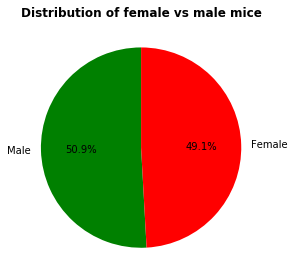

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=["green", "red"]
mice_sex=clean_data_df["Sex"].value_counts()
labels=clean_data_df["Sex"].unique()
plt.pie(mice_sex, autopct="%1.1f%%", startangle=90, colors=colors, labels=labels)
plt.title("Distribution of female vs male mice", fontweight="bold", fontsize=12)
plt.ylabel("")
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#sort summary of tumor volumes to find more promising drugs (i.e. smaller mean volumes)
summary_tumor_volume_df["Mean"].sort_values()  #--> more promising: Ramicane, Capomulin, Propriva and Ceftamin

promising_drugs=["Ramicane", "Capomulin", "Propriva", "Ceftamin"]

#Define function to calculate iqr and outliers
def calculate_iqr_outliers(drug):
    final_volume_drug= clean_data_df["Tumor Volume (mm3)"].loc[(clean_data_df["Timepoint"]== 45) &\
                                                      (clean_data_df["Drug Regimen"]==drug)]
    quartiles=final_volume_drug.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq - lowerq
    lower_bound= lowerq - (1.5*iqr)
    upper_bound= upperq + (1.5*iqr)
    outliers= [x for x in final_volume_drug if x < lower_bound or x > upper_bound ]
    return outliers


for drug in promising_drugs:
    outliers_drug=calculate_iqr_outliers(drug)
    print (outliers_drug)
#--> empty list =  no outliers

[]
[]
[]
[]


In [15]:
#TESTTTTTTTTTTTT

time_45=clean_data_df.loc[clean_data_df["Timepoint"] == 45]
time_0=clean_data_df.loc[clean_data_df["Timepoint"] == 0]

drugs_45=time_45.groupby("Drug Regimen")
drugs_0=time_0.groupby("Drug Regimen")

mean_45= drugs_45["Tumor Volume (mm3)"].mean()
mean_0= drugs_0["Tumor Volume (mm3)"].mean()
dt=mean_0 - mean_45
dt

Drug Regimen
Capomulin     8.763886
Ceftamin    -19.132421
Infubinol   -20.755562
Ketapril    -25.662958
Naftisol    -24.265506
Placebo     -23.084082
Propriva    -21.258529
Ramicane     10.044405
Stelasyn    -23.438310
Zoniferol   -20.960888
Name: Tumor Volume (mm3), dtype: float64

Text(0, 0.5, 'Tumor Volume (mm3)')

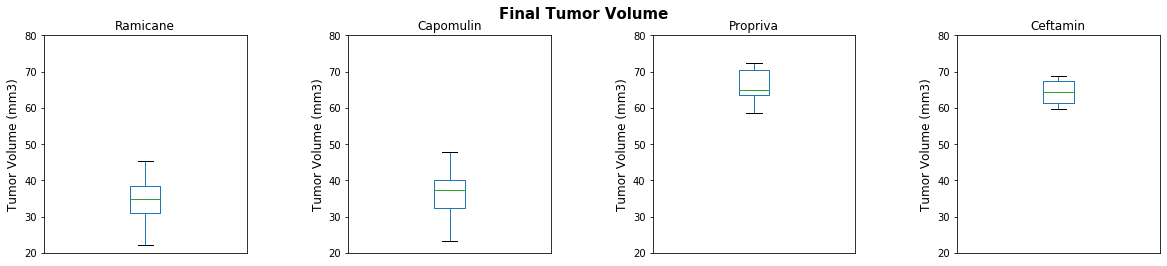

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#create figure
fig, ax=plt.subplots(nrows=1, ncols=4, figsize=(20,4))
fig.suptitle("Final Tumor Volume", fontsize=15, fontweight="bold")
fig.subplots_adjust(hspace=0.5, wspace=0.5)
yticks=(np.arange(20, 90, 10))

#define function to retrieve drug info and plot
def plot_box(drug,i):
    final_drug= clean_data_df["Tumor Volume (mm3)"].loc[(clean_data_df["Timepoint"]== 45) &\
                                                      (clean_data_df["Drug Regimen"]==drug)]
    plot_drug= final_drug.plot(kind="box", ax=ax[i], title= drug, xticks=[], yticks=yticks).\
                    set_ylabel("Tumor Volume (mm3)", fontsize=12)
    return plot_drug

#subplots
plot_box("Ramicane",0)
plot_box("Capomulin",1)
plot_box("Propriva",2)
plot_box("Ceftamin",3)

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor volume evolution for a mouse treated with Capomulin')

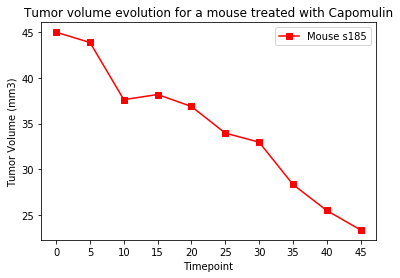

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse="s185"
drug="Capomulin"

line_s185= clean_data_df[["Tumor Volume (mm3)", "Timepoint"]].loc[(clean_data_df["Drug Regimen"]==drug)&\
                                                                  (clean_data_df["Mouse ID"]==mouse)]
line_s185.plot(x="Timepoint", y="Tumor Volume (mm3)", label="Mouse s185", marker="s", color="red")

plt.ylabel("Tumor Volume (mm3)")
plt.xticks(line_s185["Timepoint"])
plt.title("Tumor volume evolution for a mouse treated with Capomulin")


([<matplotlib.axis.XTick at 0x296505c3ec8>,
 <a list of 12 Text xticklabel objects>)

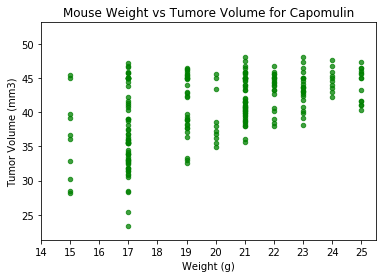

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin= clean_data_df[["Tumor Volume (mm3)", "Weight (g)"]].loc[(clean_data_df["Drug Regimen"]=="Capomulin")]
capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",\
               title=("Mouse Weight vs Tumore Volume for Capomulin"), alpha=0.75, color="green")
x=capomulin["Weight (g)"]
y=capomulin["Tumor Volume (mm3)"]

plt.ylim(min(y)-2, max(y)+5)
plt.xlim(min(x)-0.5, max(x)+0.5)
plt.xticks(np.arange(min(x)-1, max(x)+1, 1.0))

## Correlation and Regression

The correlation coefficient for mouse weight and tumore volume for the Capomulin regimen is 0.526


Text(20, 30, 'y=0.96x + 21.49')

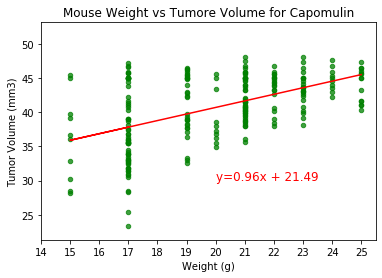

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#mouse weight versus average tumor volume (see cell above)
capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",\
               title=("Mouse Weight vs Tumore Volume for Capomulin"), alpha=0.75, color="green")
plt.ylim(min(y)-2, max(y)+5)
plt.xlim(min(x)-0.5, max(x)+0.5)
plt.xticks(np.arange(min(x)-1, max(x)+1, 1.0))


#calculate correlation (with regression coefficient)
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x, y)

#print regression coefficient
print(f'The correlation coefficient for mouse weight and tumore volume \
for the Capomulin regimen is {str(round(rvalue,3))}')

#plot regression values
regress_values=x*slope + intercept
line_eq= "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (20,30), fontsize=12, color="red")

